## Regressão Linear

In [1]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import probplot, norm
import matplotlib.pyplot as plt

C:\Users\vitor\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def regre(x, y):
    X = sm.add_constant(x)
    model = sm.OLS(y, X)
    result = model.fit()
    return result

In [3]:
dados = pd.read_csv('featuresdf1.csv')

In [4]:
dados.head()

,Unnamed: 0,id,name,artists,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0802,0.5810,0.000000,0.0931,0.931,95.977
1,1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,0.1200,0.2290,0.000000,0.0924,0.813,88.931
2,2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,0.1700,0.2090,0.000000,0.1120,0.846,177.833
3,3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0317,0.0498,0.000014,0.1640,0.446,103.019
4,4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,0.0367,0.0552,0.000000,0.1670,0.811,80.924


In [57]:
quant = ['danceability','speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'loudness']

In [58]:
quant_x = quant.copy()

In [59]:
re = regre(dados.loc[:, quant_x], dados.energy)
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 energy   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     17.99
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           7.38e-15
Time:                        08:18:57   Log-Likelihood:                 98.909
No. Observations:                 100   AIC:                            -181.8
Df Residuals:                      92   BIC:                            -161.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.9568      0.096      9.999      0.000       0.767       1.147
danceability        -0.1484      0.089     -1.659      0.100      -0.326       0.029
speechiness          0.2296      0.116      1.988      0.050       0.000       0.459
instrumentalness     0.8338      0.371      2.245      0.027       0.096       1.571
liveness             0.1823      0.120      1.520      0.132      -0.056       0.420
valence              0.0768      0.054      1.432      0.156      -0.030       0.183
tempo                0.0003      0.000      0.862      0.391      -0.000       0.001
loudness             0.0578      0.006      8.994      0.000       0.045       0.071
==============================================================================
Omnibus:                        1.271   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.119
Skew:                           0.063   Prob(JB):                        0.572
Kurtosis:                       2.497   Cond. No.                     4.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

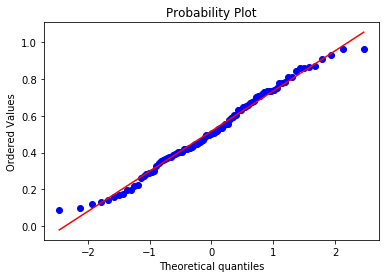

In [68]:
probplot(dados.valence, dist='norm', plot=plt);